# Diabetes Prediction Model

## Import Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
from scipy import stats #used to determine skewness
from pandas.plotting import scatter_matrix

## Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df=pd.read_csv('/content/drive/MyDrive/diabetes.csv') #tracy's
#df=pd.read_csv('/content/drive/MyDrive/Y3S1-cloud/FAI(G7)/diabetes.csv') #erwin's
df=pd.read_csv('/content/drive/MyDrive/diabetes.csv') #angeline's
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

## Data Understanding

---
☑ perform data exploration using techniques like data visualization and data profiling
1.   Head of the dataset
2.   Shape of the data set
3.   Types of columns
4.   Information about data set
5.   Summary of the data set

☑ data profiling enables us to calculate basic statistics like means, medians, and standard deviations

☑ data visualization offers a visual comprehension of data distributions and facilitates the detection of potential outliers or anomalies.
histograms, scatter plots, and box plots

---

In [ ]:
# view top 5 rows of the dataframe
print("First 5 Rows:")
df.head()


First 5 Rows:


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
# last 5 rows
print("Last 5 Rows:")
df.tail()

Last 5 Rows:


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [ ]:
# inspect the number of rows and columns in this dataframe
df.shape

(768, 9)

In [ ]:
# Accessing the columns attribute
column_names = df.columns
print("Column names:", column_names)

Column names: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
# display the data type of each column
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
# Display the information about the data types, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Display summary statistics for numerical columns
  # count (number of non-null values)
  # mean: average value of the data in the column
  # standard deviation: amount of variation or dispersion of a set of values
  # minimum: smallest value in the column
  # 25th percentile (Q1): measure of the data's spread in the lower direction
  # median (50th percentile or Q2): represents the center of the data distribution
  # 75th percentile (Q3): measure of the data's spread in the upper direction
  # maximum: largest value in the column
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Note:<br>
*Typically, the normal range of **glucose** is around 70 to 100 mg/dL, with postprandial levels ideally below 140 mg/dL;*

*normal **blood pressure** is around 120/80 mm Hg;*

*normal **skin thickness** varies across the body, whcih means that will more than 0.1 millimeters*

*normal **insulin levels** are generally between 5 and 15 uIU/mL;*

*The **BMI** categories include underweight (BMI less than 18.5), normal weight (BMI 18.5 to 24.9), overweight (BMI 25 to 29.9), and obesity (BMI 30 or greater).*

▶**Data Understanding Conclusion:** <br>
According to the above results, we can be observed that this dataframe has a total of 768 rows and 9 columns, and except BMI and DiabetesPedigreeFunction are float64, other attributes are int64.
Although all data are no null value, but we found that its "min" value have 0.

Logically, all glucose, blood pressure, skin thickness, insulin and BMI cannot have 0 value. So we will perform data cleaning and replacing the 0 value using interpolation.

In addition, we can see that the "max" value of insulin shown in 846, it should not exist that high, so we will perform outlier detection in a later step.

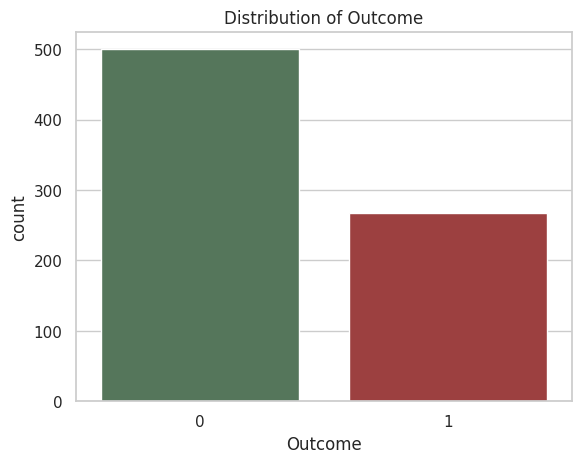

In [ ]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# view the "outcome" is balanced or not
sns.countplot(x="Outcome", data=df, palette={0: '#507B58', 1: '#AB3131'})
plt.title("Distribution of Outcome")
plt.show()

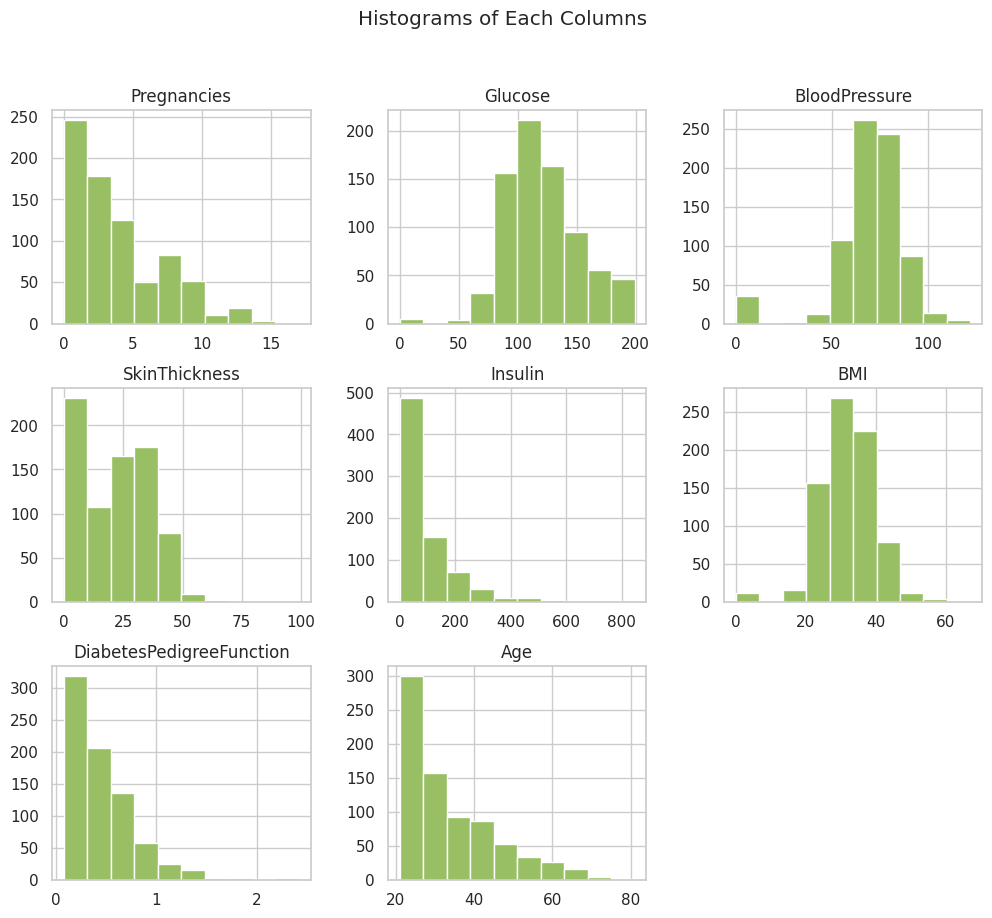

In [ ]:
# Selecting columns for histograms (excluding "Outcome")
columns_to_plot = df.drop("Outcome", axis=1).columns

# Histograms for each columns except outcome column
df[columns_to_plot].hist(figsize=(12, 10), color='#98BF64', edgecolor='white')
plt.suptitle("Histograms of Each Columns")
plt.show()

Note:<br>
Only glucose and blood pressure are found to be regularly distributed; others are skewed and have outliers.





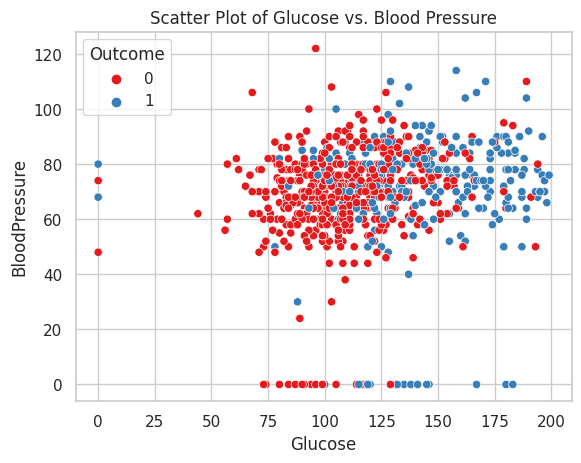

In [ ]:
# Scatter plot for two Glucose and BloodPressure columns
sns.scatterplot(x='Glucose', y='BloodPressure', data=df, hue='Outcome', palette='Set1')
plt.title("Scatter Plot of Glucose vs. Blood Pressure")
plt.show()

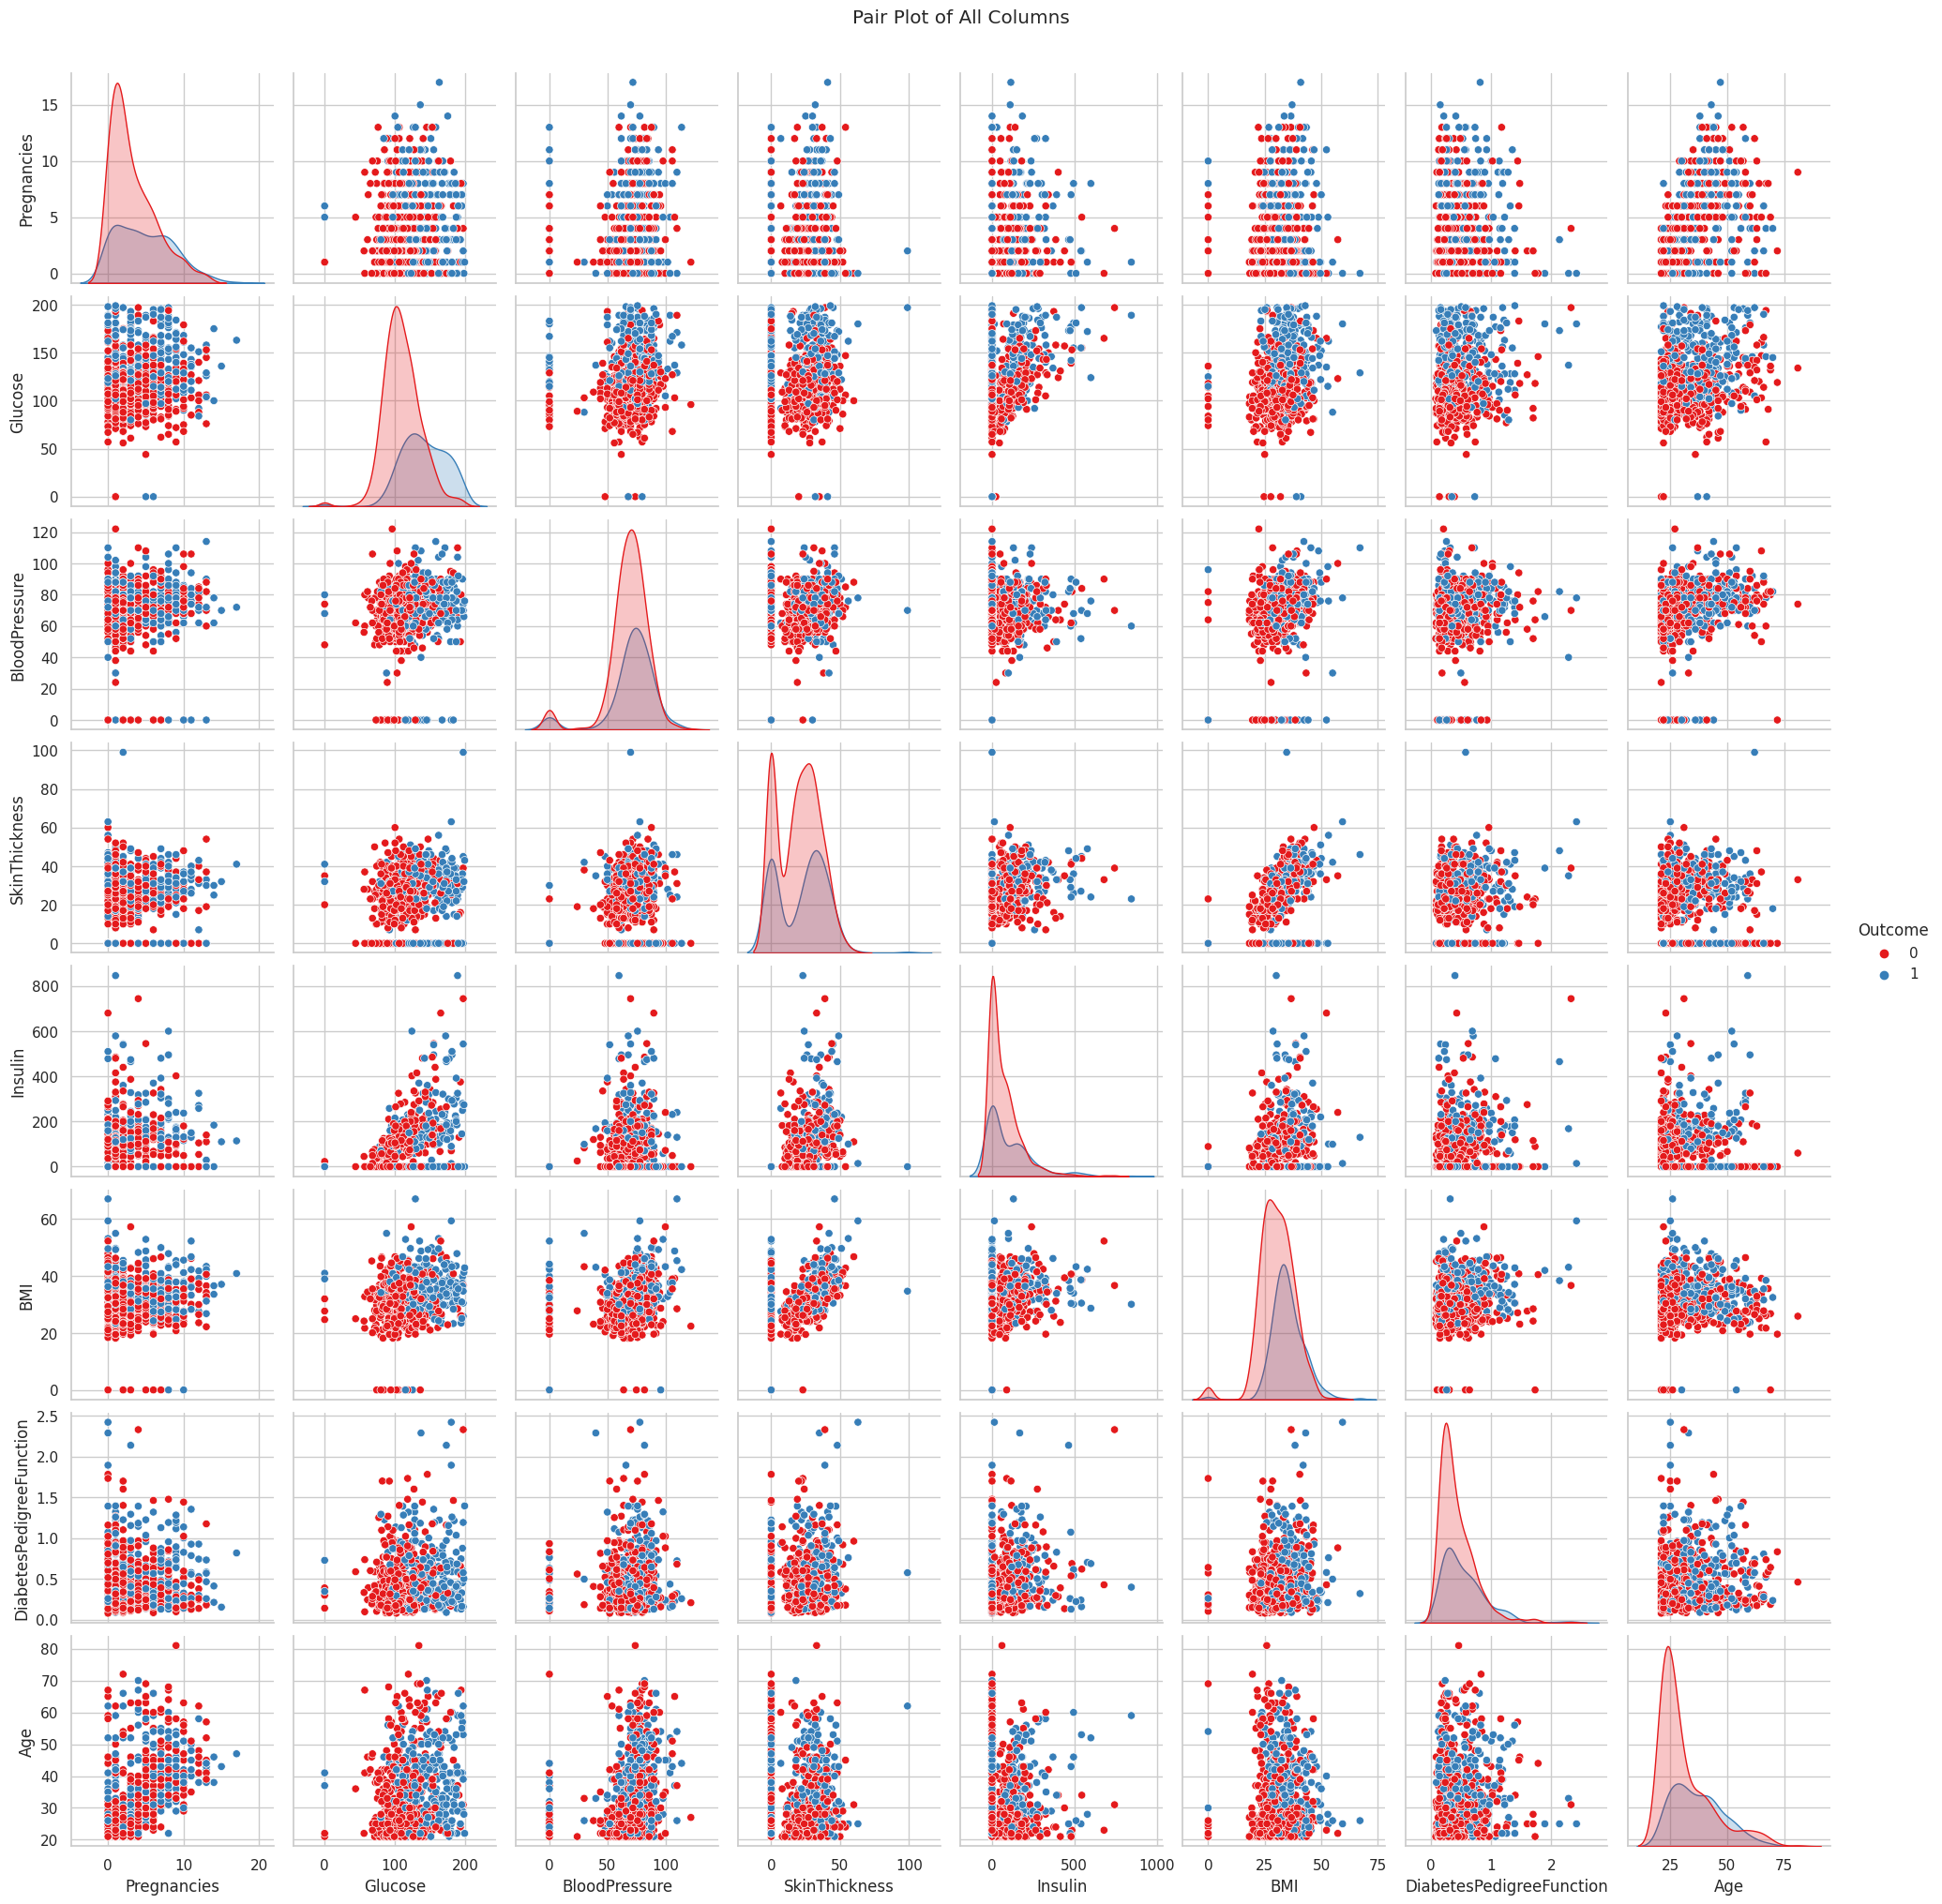

In [ ]:
sns.set(style="whitegrid")

# Create a pair plot for all columns, color-coded by "Outcome"
sns.pairplot(df, hue='Outcome', palette='Set1')
plt.suptitle("Pair Plot of All Columns", y = 1.02)
plt.show()


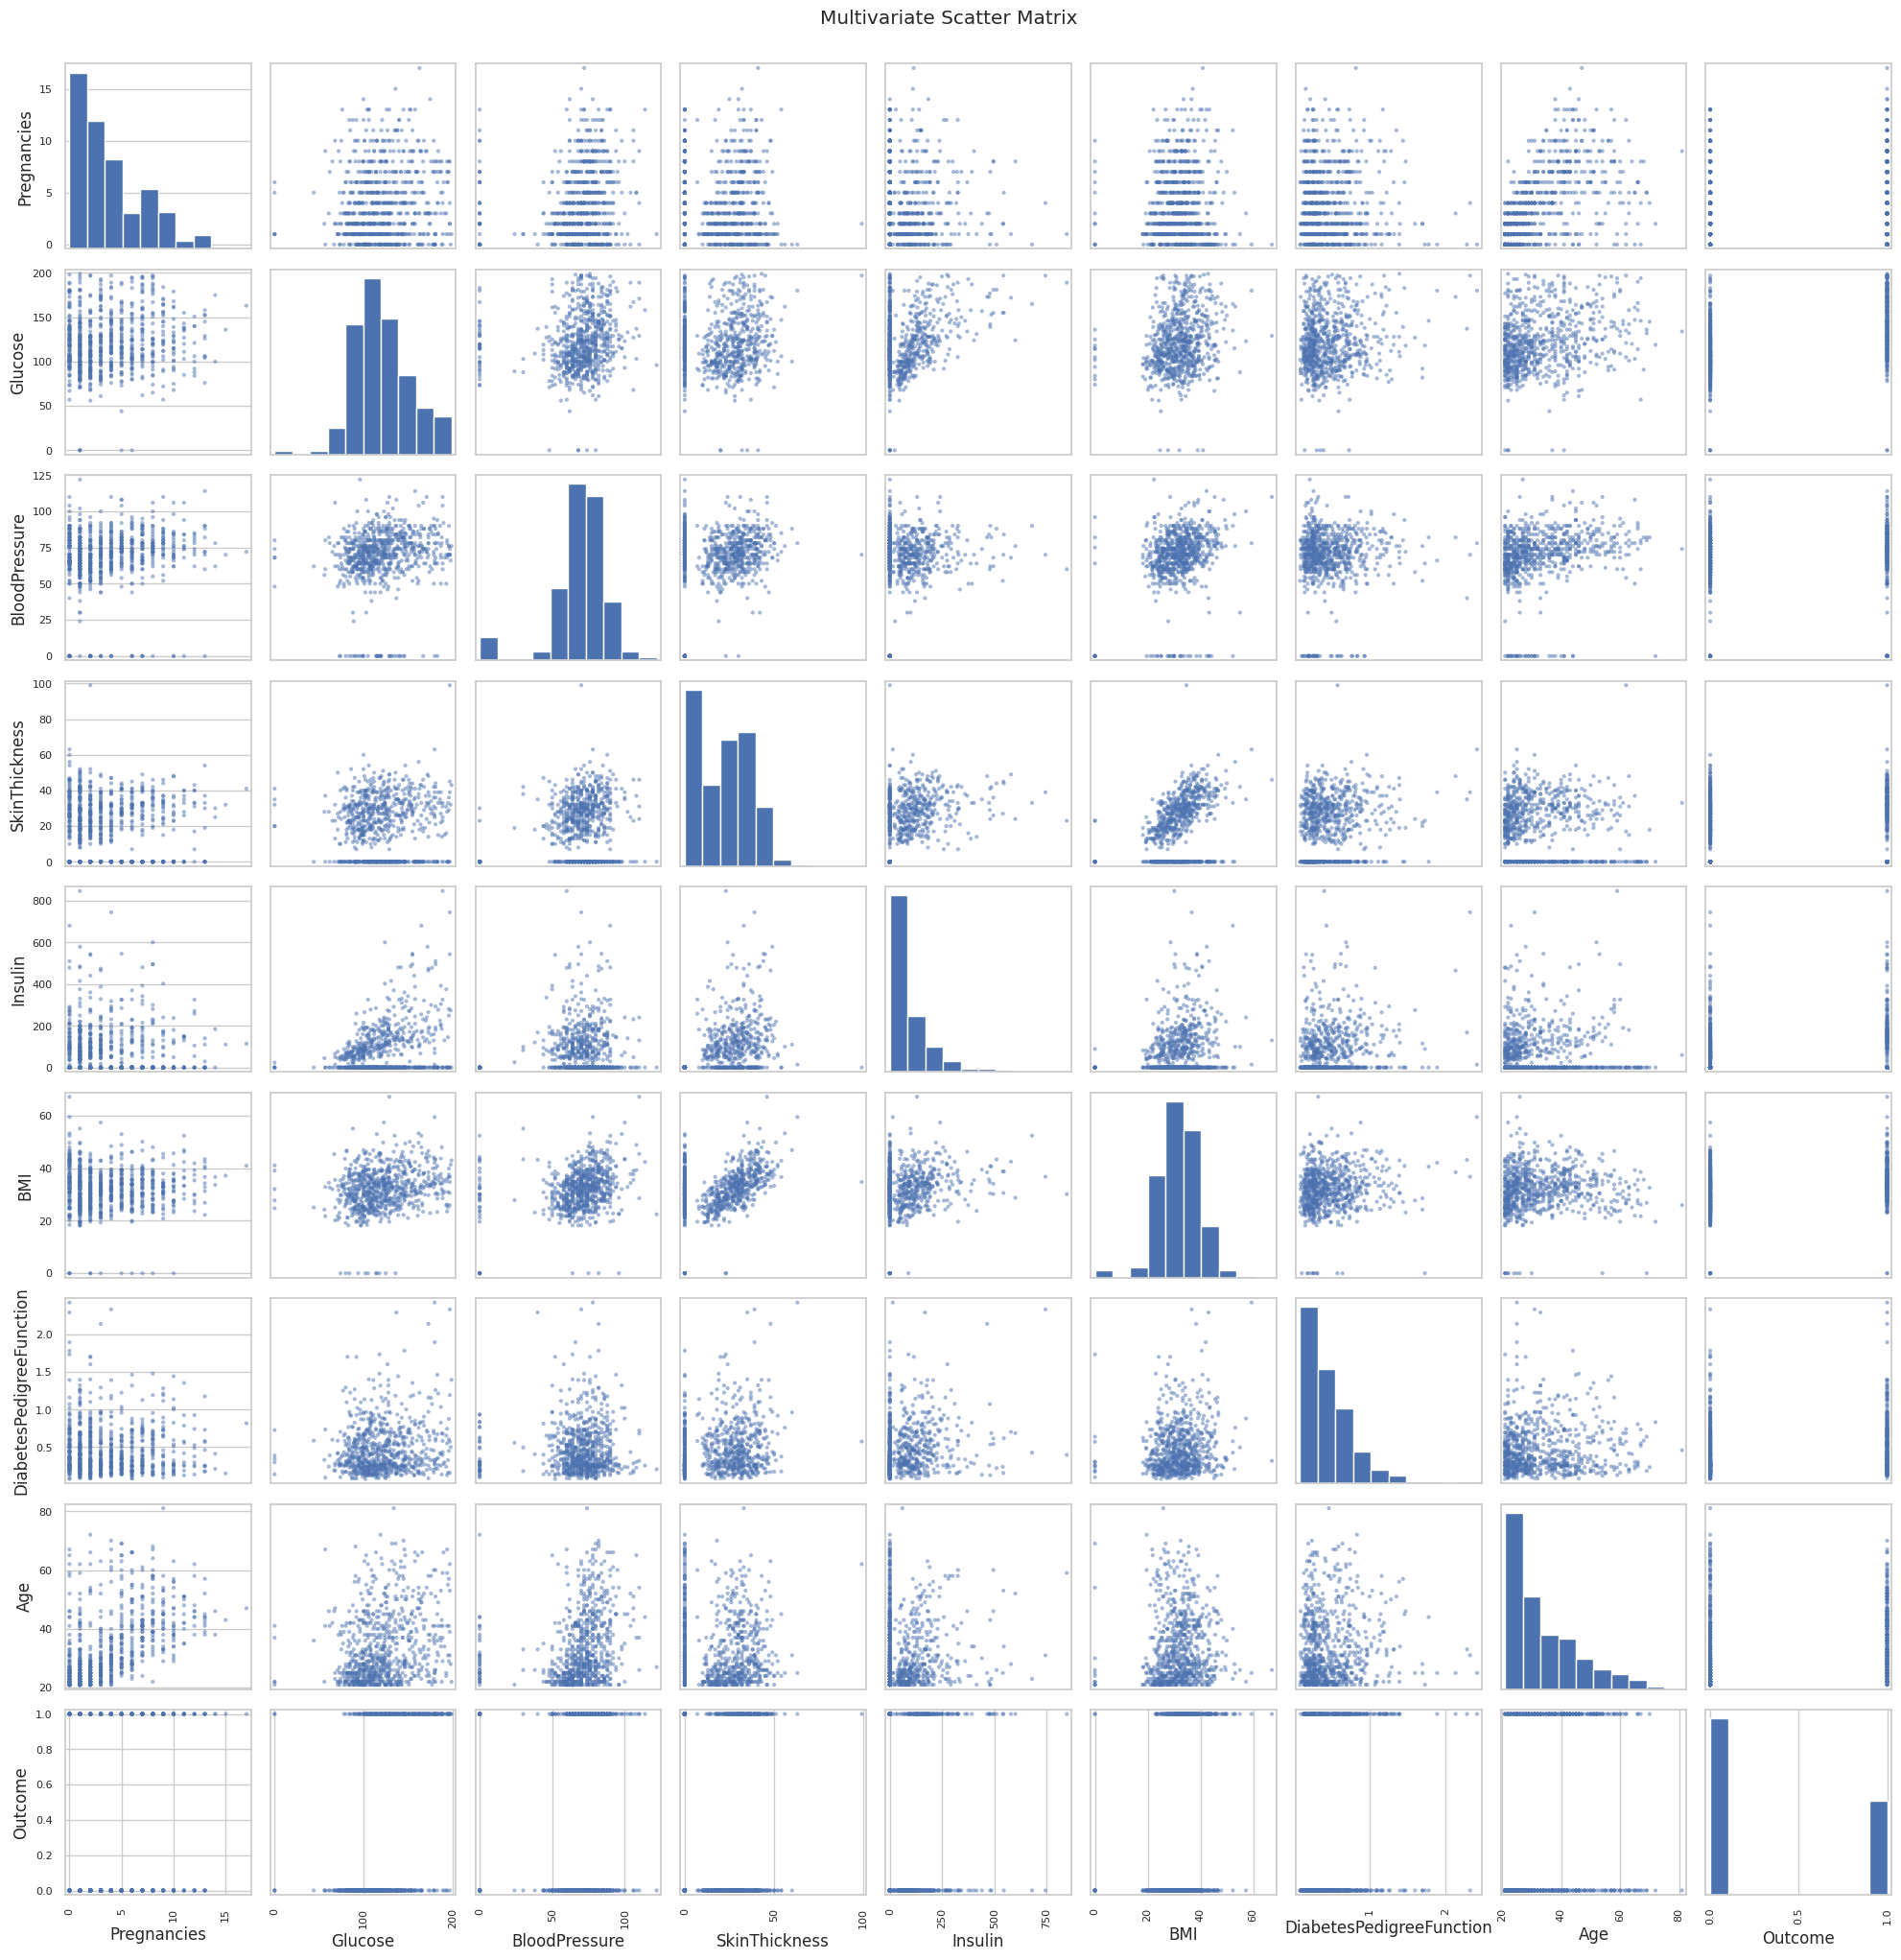

In [ ]:
scatter_matrix(df, figsize=(20, 20))
plt.tight_layout(pad=1.0)
plt.suptitle("Multivariate Scatter Matrix", y = 1.02)
plt.show()

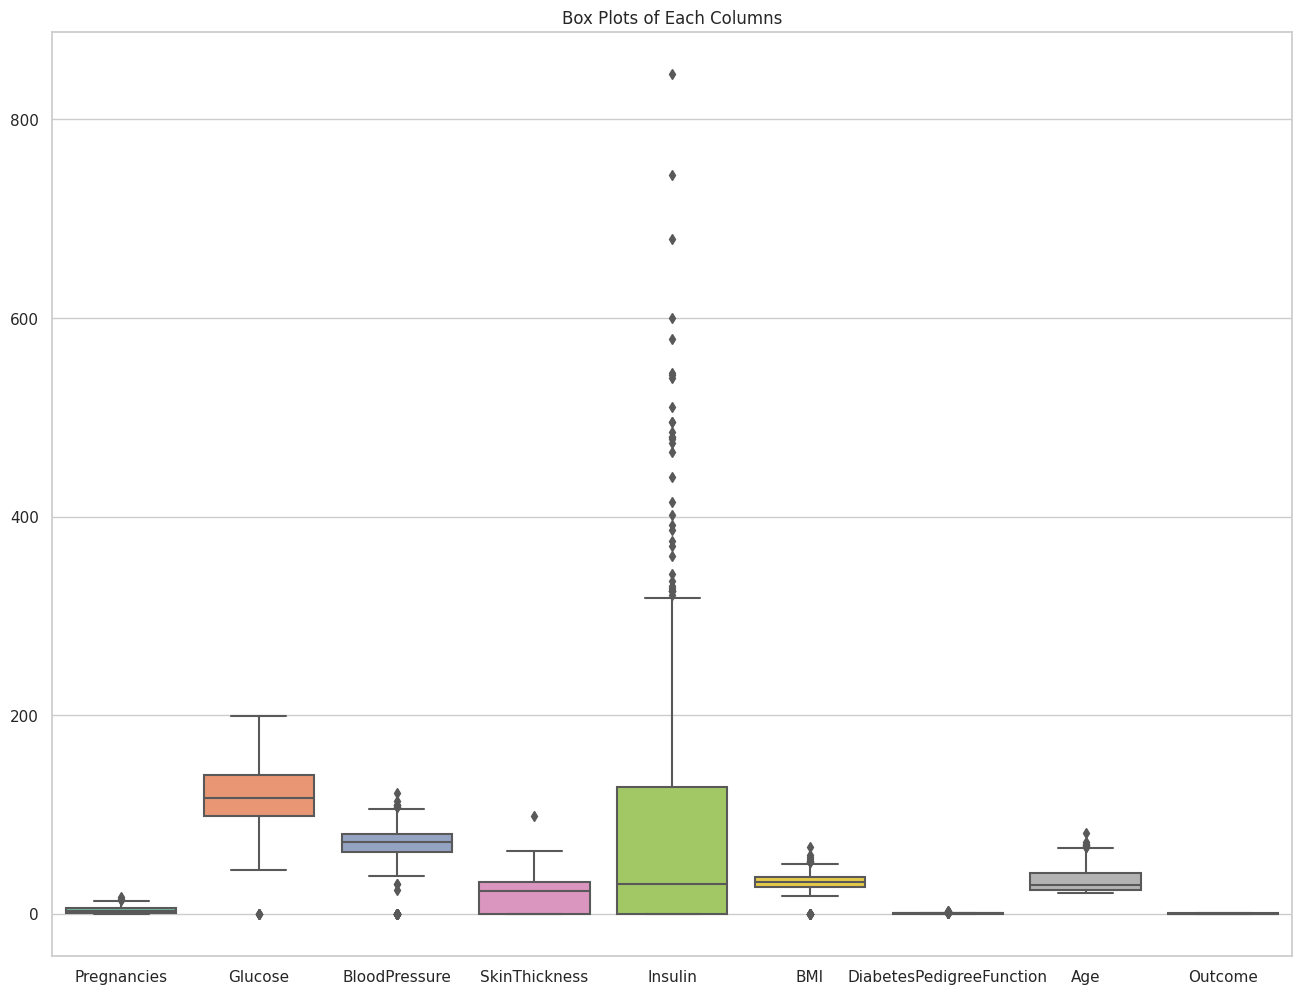

In [ ]:
# Box plot for each columns
plt.figure(figsize=(16,12))
sns.boxplot(data=df, palette='Set2')
plt.title("Box Plots of Each Columns")
plt.show()

Note:<br>
According to the Box plot above, we observe that some columns have outliers, such as Blood Presure, Skin Thickness, BMI, especially Insulin.

---

## Data Preparation

---
❗missing values -> all attributes cannot logically have **zero** values.

☑ Data cleaning : handling of missing values and transformations of variables as needed
1. Dropping duplicate values
2. Checking NULL values

☑ performed interpolation to fill the missing data with average values for these specific attributes.
1. Checking for 0 value and replacing it (interpolation)

☑ perform outlier detection to identify and handle the outliers to improve the model quality and performance by using interquartile range (IQR).Check result using:
1. Box plots
2. Using Z score

---

In [ ]:
duplicates_exist = df.duplicated().any()

if duplicates_exist:
    print("Yes, duplicates found. Proceeding to clean.")
    df = df.drop_duplicates()
else:
    print("No duplicates found. No cleaning required.")

No duplicates found. No cleaning required.


In [ ]:
null_counts = df.isnull().sum()

if null_counts.sum() > 0:
    print("Yes, null values found. Here are the counts:")
    print(null_counts)
else:
    print("No null values found.")

No null values found.


In [ ]:
columns_to_check = ['BloodPressure', 'Glucose', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_check:
    count_zeros = (df[column] == 0).sum()
    if count_zeros > 0:
        print(f"Yes, there are 0 values in column {column}, there are total of {count_zeros} 0 values.")
    else:
        print(f"No, there are no 0 values in column {column}")


Yes, there are 0 values in column BloodPressure, there are total of 35 0 values.
Yes, there are 0 values in column Glucose, there are total of 5 0 values.
Yes, there are 0 values in column SkinThickness, there are total of 227 0 values.
Yes, there are 0 values in column Insulin, there are total of 374 0 values.
Yes, there are 0 values in column BMI, there are total of 11 0 values.


Check skewness for 0 values replacement

In [ ]:
for column in columns_to_check:
    skewness = df[column].skew()
    print(f"Skewness for {column}: {skewness}")

Skewness for BloodPressure: -1.8436079833551302
Skewness for Glucose: 0.17375350179188992
Skewness for SkinThickness: 0.10937249648187608
Skewness for Insulin: 2.272250858431574
Skewness for BMI: -0.42898158845356543


Note: <br>
Replace 0 values with Median (Skewed Distributions):

1. BloodPressure: Highly negatively skewed. (-1.8436079833551302)
2. Insulin: Highly positively skewed. (2.272250858431574)
3. BMI: Moderately negatively skewed. (-0.42898158845356543)

Replace 0 values with Mean (Approximately Normal Distributions):

1. Glucose: Slightly positively skewed, but relatively close to normal. (0.17375350179188992)
2. SkinThickness: Slightly positively skewed, but relatively close to normal. (0.10937249648187608)

In [ ]:
#replace 0 values with Median:
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

#replace 0 values with Mean:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [ ]:
df2 = df.drop("Outcome", axis = "columns")

In [ ]:
for column in df.iloc[:, :-1].columns:
    skewness = df[column].skew()
    print(f"Skewness for {column}: {skewness}")

Skewness for Pregnancies: 0.9016739791518588
Skewness for Glucose: 0.5332247526703329
Skewness for BloodPressure: 0.1418850201030565
Skewness for SkinThickness: 1.2266699605994507
Skewness for Insulin: 2.693180713015471
Skewness for BMI: 0.6010587212883255
Skewness for DiabetesPedigreeFunction: 1.919911066307204
Skewness for Age: 1.1295967011444805


Note: <br>
Remove outliers and replace with median:
1. Pregnancies
2. SkinThickness
3. Insulin
4. DiabetesPedigreeFunction
5. Age

Remove outliers and replace with mean:
1. Glucose
2. BloodPressure
3. BMI


In [ ]:
# List of columns to remove outliers and replace with median
replace_with_median = ['Pregnancies', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']

for column in replace_with_median:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the IQR (Interquartile range)
    IQR = Q3 - Q1

    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers and replace them with the median
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    df.loc[outliers, column] = df[column].median()

In [ ]:
# List of columns to remove outliers and replace with mean
replace_with_mean = ['Glucose', 'BloodPressure', 'BMI']

for column in replace_with_mean:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the IQR (Interquartile range)
    IQR = Q3 - Q1

    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers and replace them with the mean
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    mean_value = df[column].mean()
    df.loc[outliers, column] = mean_value

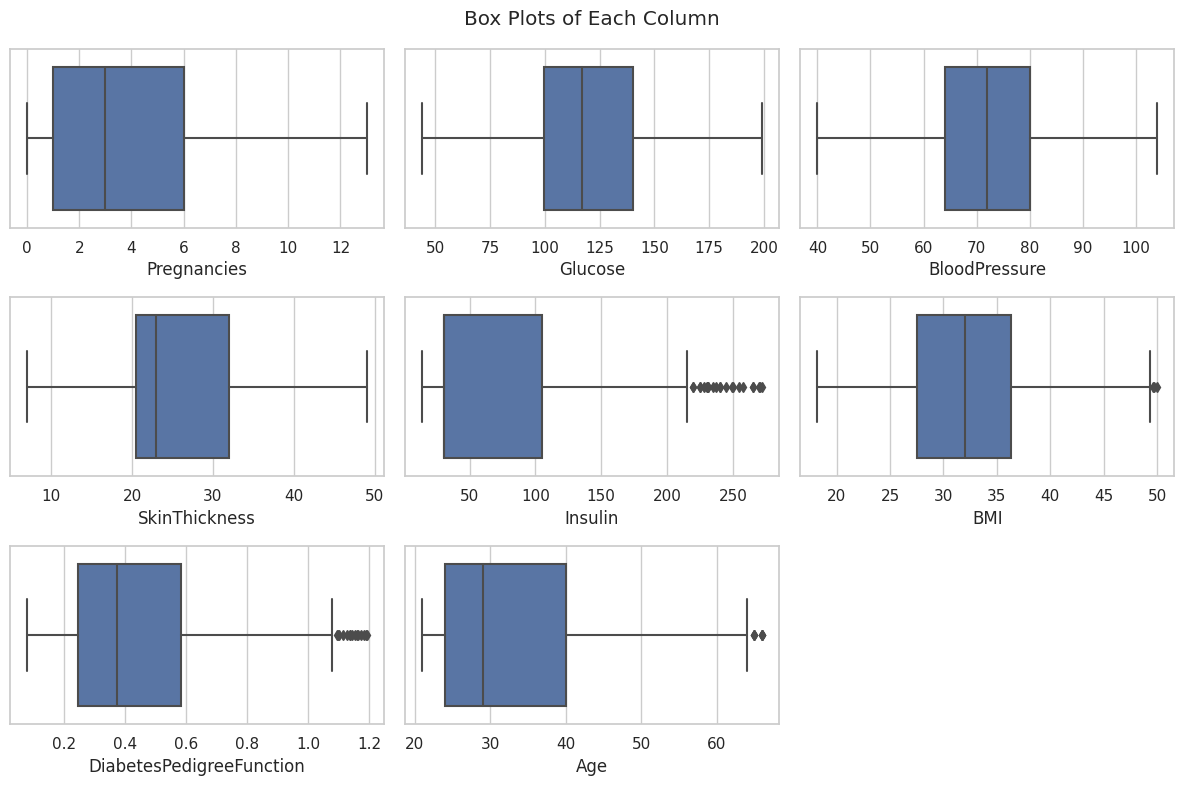

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in its subplot
for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i])

axes[-1].set_visible(False)

# Adjust layout for better display
plt.suptitle("Box Plots of Each Column")
plt.tight_layout()
plt.show()


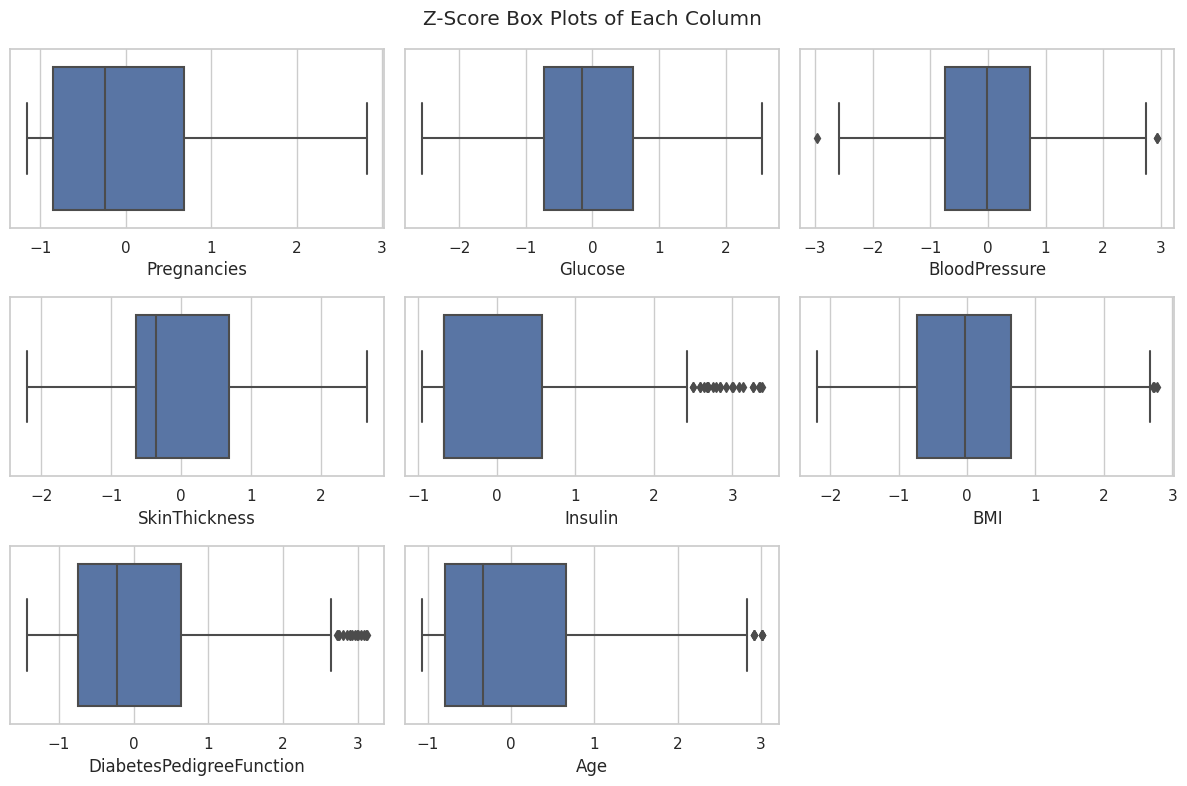

In [ ]:
from scipy.stats import zscore

fig, axes = plt.subplots(3, 3, figsize=(12, 8))

df_zscores = df.apply(zscore)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot Z-scores of each column in its subplot
for i, column in enumerate(df_zscores.columns):
    sns.boxplot(x=df_zscores[column], ax=axes[i])

axes[-1].set_visible(False)

# Adjust layout for better display
plt.suptitle("Z-Score Box Plots of Each Column")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import QuantileTransformer

# Create a QuantileTransformer object
quantile_transformer = QuantileTransformer(n_quantiles=len(df), output_distribution='normal', random_state=0)

# List of columns to be transformed
columns_to_transform = ['Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Apply the QuantileTransformer to the specified columns
df[columns_to_transform] = quantile_transformer.fit_transform(df[columns_to_transform])

In [ ]:
column_with_outliers = ['Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in df[column_with_outliers]:
    skewness = df[column].skew()
    print(f"Skewness for {column}: {skewness}")

Skewness for Insulin: 0.4055062550458518
Skewness for BMI: -0.24490623886667984
Skewness for DiabetesPedigreeFunction: 9.793342386401535e-05
Skewness for Age: -1.5758159842175947


In [ ]:
# List of columns to remove outliers from
replace_with_median = ['Age']

for column in replace_with_median:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the IQR (Interquartile range)
    IQR = Q3 - Q1

    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers and replace them with the median
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    df.loc[outliers, column] = df[column].median()

In [ ]:
# List of columns to remove outliers from and replace with mean
replace_with_mean = [ 'BMI', 'Insulin', 'DiabetesPedigreeFunction']

for column in replace_with_mean:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the IQR (Interquartile range)
    IQR = Q3 - Q1

    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers and replace them with the mean
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    mean_value = df[column].mean()
    df.loc[outliers, column] = mean_value

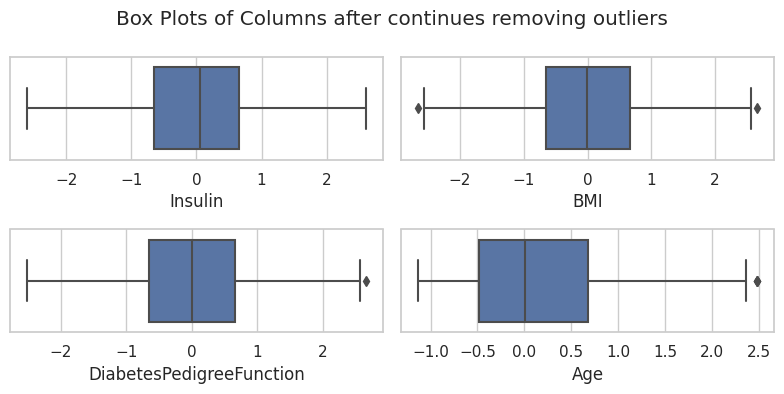

In [ ]:
df_outliers = df[['Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

fig, axes = plt.subplots(2, 2, figsize=(8, 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in its subplot
for i, column in enumerate(df_outliers.columns):
    sns.boxplot(x=df_outliers[column], ax=axes[i])

# Adjust layout for better display
plt.suptitle("Box Plots of Columns after continues removing outliers")
plt.tight_layout()
plt.show()

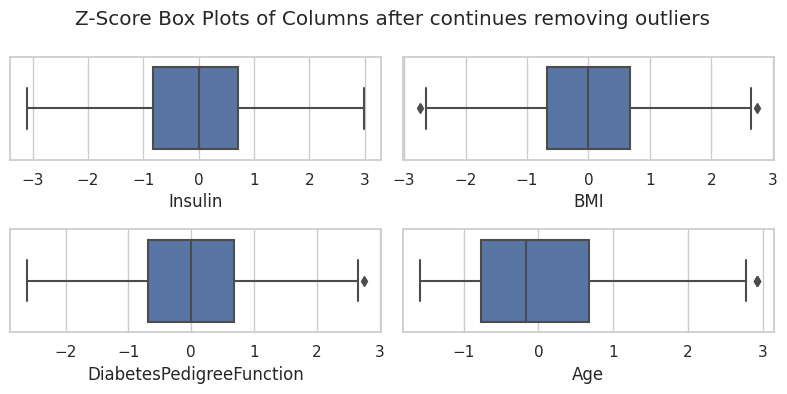

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 4))

zscores = df_outliers.apply(zscore)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot Z-scores of each column in its subplot
for i, column in enumerate(zscores.columns):
    sns.boxplot(x=zscores[column], ax=axes[i])

# Adjust layout for better display
plt.suptitle("Z-Score Box Plots of Columns after continues removing outliers")
plt.tight_layout()
plt.show()



---



## Modelling

<Axes: >

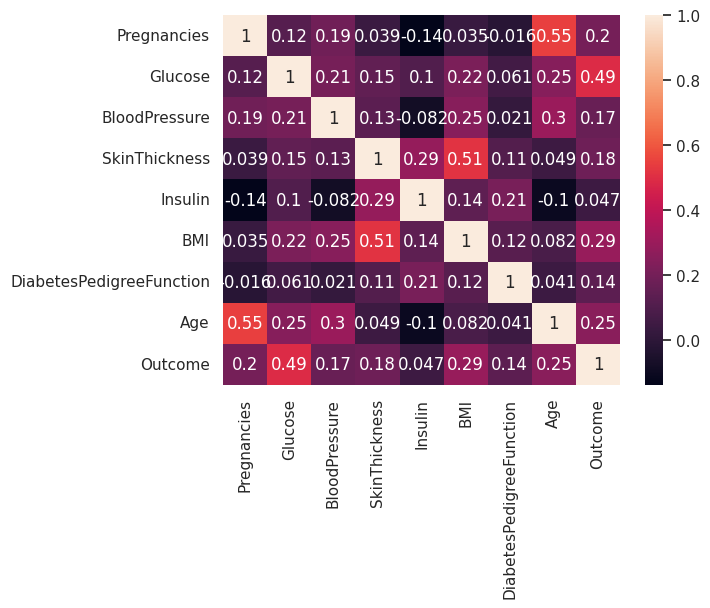

In [ ]:
#Pearson's Correlation Coefficient to find relationship between 2 quantities

corrmat = df.corr()
sns.heatmap(corrmat, annot = True)


In [ ]:
df_selected = df.drop(['BloodPressure', 'Insulin', 'DiabetesPedigreeFunction'], axis = 'columns')

In [ ]:

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Drop the 'Outcome' column to create the feature matrix X
X = df.drop('Outcome', axis=1)

# Display the DataFrame after dropping 'Outcome'
print("\nDataFrame after dropping 'Outcome':")
print(X)

# Specify the target variable
target_name = 'Outcome'

# Extract the target variable
y = df[target_name]



Original DataFrame:
     Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0              6    148.0           72.0      35.000000 -0.655127  0.257737   
1              1     85.0           66.0      29.000000 -0.655127 -0.795477   
2              8    183.0           64.0      20.536458 -0.655127 -1.421574   
3              1     89.0           66.0      23.000000  0.601378 -0.570338   
4              0    137.0           40.0      35.000000  1.268292  1.533458   
..           ...      ...            ...            ...       ...       ...   
763           10    101.0           76.0      48.000000  1.395143  0.159172   
764            2    122.0           70.0      27.000000 -0.655127  0.742760   
765            5    121.0           72.0      23.000000  0.757917 -0.845820   
766            1    126.0           60.0      20.536458 -0.655127 -0.289971   
767            1     93.0           70.0      31.000000 -0.655127 -0.256048   

     DiabetesPedigreeFunction  

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting data in 80% training data and 20% testing data
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape,y_train.shape


((614, 8), (614,))

In [ ]:
X_test.shape,y_test.shape

((154, 8), (154,))

## Evaluation

**Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [ ]:
reg = LogisticRegression(penalty='l2', C=0.5, solver='liblinear', max_iter=200)
reg.fit(X_train,y_train)

LogisticRegression(C=0.5, max_iter=200, solver='liblinear')

In [ ]:
lr_pred=reg.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       107
           1       0.61      0.57      0.59        47

    accuracy                           0.76       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.76      0.76      0.76       154


 F1:
 0.5934065934065934

 Precision score is:
 0.6136363636363636

 Recall score is:
 0.574468085106383

 Confusion Matrix:



<Axes: >

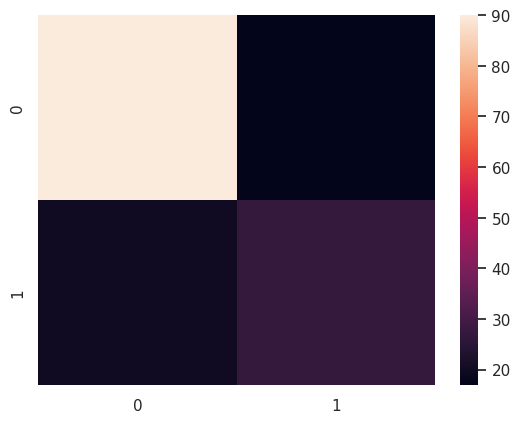

In [ ]:
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,lr_pred))

**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

In [ ]:
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [ ]:
best_model = grid_search.fit(X_train, y_train)

In [ ]:
rf_pred=best_model.predict(X_test)

Random Forest Classifier Metrics:
Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       107
           1       0.74      0.66      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154

Confusion Matrix:


K-Nearest Neighbors Classifier Metrics:
F1 Score:
 0.5591397849462365
Precision Score:
 0.5652173913043478
Recall Score:
 0.5531914893617021


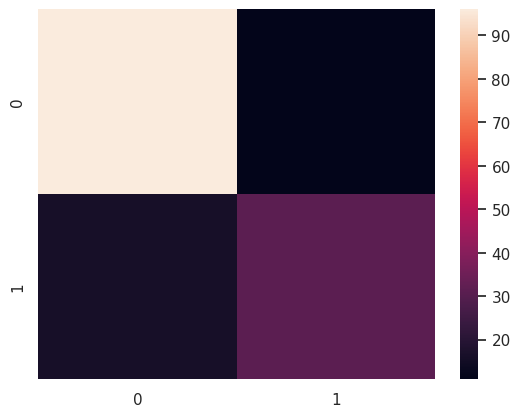

In [ ]:
print("Random Forest Classifier Metrics:")
print("Classification Report is:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test, rf_pred))

# Train K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Print K-Nearest Neighbors Classifier metrics
print("\nK-Nearest Neighbors Classifier Metrics:")
print("F1 Score:\n", f1_score(y_test, knn_pred))
print("Precision Score:\n", precision_score(y_test, knn_pred))
print("Recall Score:\n", recall_score(y_test, knn_pred))

---
☑ drop the “Outcome” attribute before training the model

☑ perform feature selection to find out the most relevant and informative features by removing the redundant features.

Pearson's Correlation Coefficient to help us identify the relationship between pairs of features among the eight attributes
 -> drop the lower correlation coefficient value of attributes

☑ perform data splitting, 80% is for training and 20% is for testing

☑ Logistic Regression, Random Forest, and Naive Bayes.

---


**Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [ ]:
best_model= nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [ ]:
nb_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       107
           1       0.69      0.53      0.60        47

    accuracy                           0.79       154
   macro avg       0.75      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154


 F1:
 0.6024096385542169

 Precision score is:
 0.6944444444444444

 Recall score is:
 0.5319148936170213

 Confusion Matrix:



<Axes: >

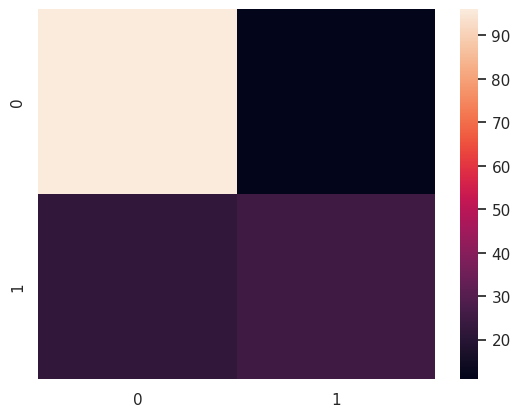

In [ ]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))